<a href="https://colab.research.google.com/github/YashPatel1604/AI-workshop-UTD/blob/main/DecisionTreesWithLibraries(MushData).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [156]:
train_mush = pd.read_csv('mush_train.data', header = None)
test_mush = pd.read_csv('mush_test.data', header = None)
train_mush = train_mush.to_numpy()
test_mush = test_mush.to_numpy()
X_train = train_mush[:,1:]
Y_train = train_mush[:,0]
X_test = test_mush[:,1:]
Y_test = test_mush[:,0]

In [100]:
for col in range(X_train.shape[1]):
  le = preprocessing.LabelEncoder()
  le.fit(X_train[:,col])
  X_train[:,col] = le.transform(X_train[:,col])
  X_test[:,col] = le.transform(X_test[:,col])

le = preprocessing.LabelEncoder()
le.fit(Y_train)
Y_train = le.transform(Y_train)
Y_test = le.transform(Y_test)


In [139]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [140]:
clf = clf.fit(X_train, Y_train)

In [141]:
predict = clf.predict(X_test)

In [142]:
predict = le.inverse_transform(predict)
# Y_test = le.inverse_transform(Y_test)

In [143]:
predict

array(['p', 'p', 'p', ..., 'p', 'e', 'p'], dtype=object)

In [144]:
accuracy_count = 0
for i in range(len(predict)):
  if predict[i] == Y_test[i]:
    accuracy_count += 1
  else:
    pass

In [152]:
accuracy_count/len(predict)*100

100.0

[Text(0.3076923076923077, 0.9375, 'X[8] <= 0.5\nentropy = 0.999\nsamples = 4712\nvalue = [2434, 2278]'),
 Text(0.23076923076923078, 0.8125, 'entropy = 0.0\nsamples = 1026\nvalue = [0, 1026]'),
 Text(0.38461538461538464, 0.8125, 'X[19] <= 1.5\nentropy = 0.924\nsamples = 3686\nvalue = [2434, 1252]'),
 Text(0.15384615384615385, 0.6875, 'X[10] <= 1.5\nentropy = 0.289\nsamples = 949\nvalue = [48, 901]'),
 Text(0.07692307692307693, 0.5625, 'entropy = 0.0\nsamples = 901\nvalue = [0, 901]'),
 Text(0.23076923076923078, 0.5625, 'entropy = 0.0\nsamples = 48\nvalue = [48, 0]'),
 Text(0.6153846153846154, 0.6875, 'X[7] <= 0.5\nentropy = 0.553\nsamples = 2737\nvalue = [2386, 351]'),
 Text(0.38461538461538464, 0.5625, 'X[19] <= 4.5\nentropy = 0.174\nsamples = 2299\nvalue = [2239, 60]'),
 Text(0.3076923076923077, 0.4375, 'entropy = 0.0\nsamples = 1924\nvalue = [1924, 0]'),
 Text(0.46153846153846156, 0.4375, 'X[10] <= 2.0\nentropy = 0.634\nsamples = 375\nvalue = [315, 60]'),
 Text(0.38461538461538464, 0

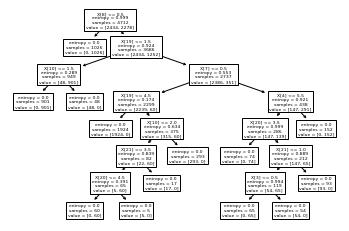

In [146]:
tree.plot_tree(clf)

In [147]:
clf.tree_.max_depth

7